In [ ]:
# TAREA 3 - ESTADISTICA DESCRIPTIVA

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/movies.csv')
df

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,9/23/1994,26.9579,8.712,28675
1,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",3/14/1972,26.5804,8.686,21701
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,12/20/1974,15.6559,8.571,13099
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,12/15/1993,12.5642,8.565,16616
4,4,389,12 Angry Men,The defense and the prosecution have rested an...,4/10/1957,14.6028,8.549,9307
...,...,...,...,...,...,...,...,...
8555,8555,238603,Earth to Echo,After a construction project begins digging in...,6/14/2014,1.6137,5.900,593
8556,8556,11968,Into the Blue,When they take some friends on an extreme spor...,9/30/2005,3.3432,5.902,1539
8557,8557,439079,The Nun,A priest with a haunted past and a novice on t...,9/5/2018,15.1733,5.901,6862
8558,8558,513409,Earthquake Bird,"Tokyo, Japan, 1989. Lucy Fly, a foreigner who ...",11/1/2019,1.1859,5.900,448


In [ ]:
# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols

Index(['Unnamed: 0', 'id', 'popularity', 'vote_average', 'vote_count'], dtype='object')

In [ ]:
'''
Estadísticos descriptivos básicos
'''
print('\nEstadísticos descriptivos:')
print(df[num_cols].describe())


Estadísticos descriptivos:
        Unnamed: 0            id   popularity  vote_average    vote_count
count  8560.000000  8.560000e+03  8560.000000   8560.000000   8560.000000
mean   4279.500000  2.163106e+05     4.370749      6.867912   2192.376869
std    2471.203485  2.879922e+05    21.398538      0.581178   3430.230375
min       0.000000  2.000000e+00     0.003400      5.900000    300.000000
25%    2139.750000  1.010800e+04     1.728925      6.400000    485.000000
50%    4279.500000  3.776850e+04     2.566650      6.812500    916.000000
75%    6419.250000  3.991332e+05     4.248675      7.298250   2237.000000
max    8559.000000  1.426776e+06  1274.226400      8.712000  37773.000000


In [ ]:
'''
 Matriz de correlación
 '''
corr = df[num_cols].corr(method='pearson')
print('\nMatriz de correlación:')
print(corr)


Matriz de correlación:
              Unnamed: 0        id  popularity  vote_average  vote_count
Unnamed: 0      1.000000  0.015095   -0.034180     -0.987728   -0.237072
id              0.015095  1.000000    0.113909     -0.013361   -0.098979
popularity     -0.034180  0.113909    1.000000      0.039058    0.104845
vote_average   -0.987728 -0.013361    0.039058      1.000000    0.269597
vote_count     -0.237072 -0.098979    0.104845      0.269597    1.000000


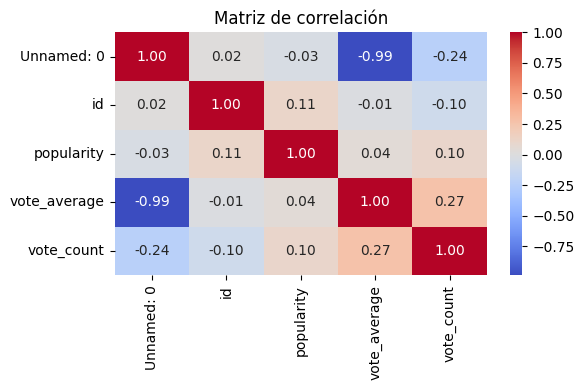

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

In [ ]:
'''
Ejemplo de prueba de hipótesis: correlación vote_average vs vote_count
'''
x = df['vote_average'].dropna()
y = df['vote_count'].dropna()
r, p = stats.pearsonr(x,y)
print(f'\nPrueba de hipótesis correlación vote_average-vote_count: r={r:.2f}, p={p:.4f}')
if p < 0.05:
  print('Hay evidencia de correlación significativa')
else:
  print('No hay evidencia de correlación significativa')


Prueba de hipótesis correlación vote_average-vote_count: r=0.27, p=0.0000
Hay evidencia de correlación significativa


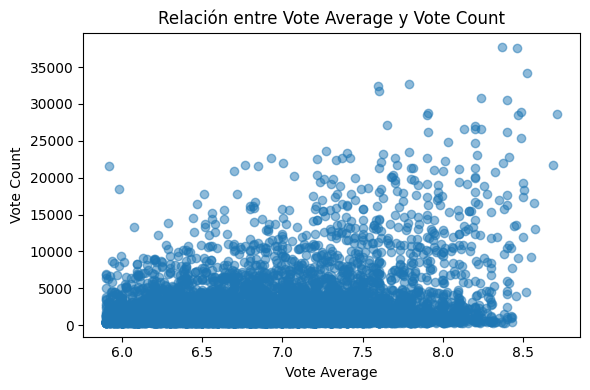

In [ ]:
'''
Ejemplo de gráfica de dispersión
'''
plt.figure(figsize=(6,4))
plt.scatter(df['vote_average'], df['vote_count'], alpha=0.5)
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.title('Relación entre Vote Average y Vote Count')
plt.tight_layout()
plt.show()